Starting Total Coloring Game on Path Graph
Vertices: [1, 2, 3, 4, 5]
Edges: [(1, 2), (2, 3), (3, 4), (4, 5)]


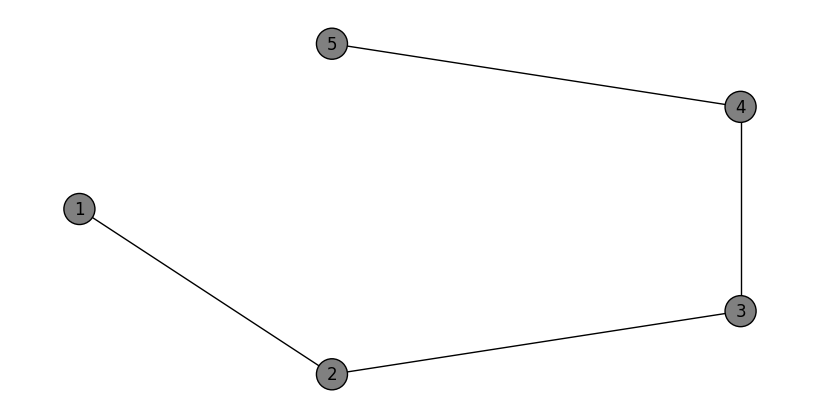

Current coloring: {}
Available moves (vertices & edges): [1, 2, 3, 4, 5, (1, 2), (2, 3), (3, 4), (4, 5)]


KeyboardInterrupt: Interrupted by user

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random

def create_path_graph(n):
    """Creates a path graph with n vertices, starting at 1 instead of 0"""
    G = nx.path_graph(n)
    mapping = {i: i + 1 for i in G.nodes()}
    G = nx.relabel_nodes(G, mapping)
    return G

def create_cycle_graph(n):
    """Creates a cycle graph with n vertices, starting at 1 instead of 0"""
    G = nx.cycle_graph(n)
    mapping = {i: i + 1 for i in G.nodes()}
    G = nx.relabel_nodes(G, mapping)
    return G

def is_illegal_move(graph, move, chosen_color, coloring):
    """Checks if the move violates total coloring rules."""
    if isinstance(move, int):  # If it's a vertex
        if move in coloring:
            return True
        for neighbor in graph.neighbors(move):
            if coloring.get(neighbor) == chosen_color:
                return True
        for edge in graph.edges(move):
            if coloring.get(edge) == chosen_color:
                return True
    else:  # If it's an edge
        v1, v2 = move
        if move in coloring:
            return True
        if coloring.get(v1) == chosen_color or coloring.get(v2) == chosen_color:
            return True
        for edge in list(graph.edges(v1)) + list(graph.edges(v2)):
            if edge != move and coloring.get(edge) == chosen_color:
                return True
    return False

def valid_colors(available_colors, graph, node_or_edge, coloring):
    """Finds valid colors for a given vertex or edge while enforcing total coloring rules."""
    used_colors = set()
    if isinstance(node_or_edge, int):  # Vertex
        for neighbor in graph.neighbors(node_or_edge):
            if neighbor in coloring:
                used_colors.add(coloring[neighbor])
        for edge in graph.edges(node_or_edge):
            if edge in coloring:
                used_colors.add(coloring[edge])
    else:  # Edge
        v1, v2 = node_or_edge
        if v1 in coloring:
            used_colors.add(coloring[v1])
        if v2 in coloring:
            used_colors.add(coloring[v2])
        for edge in list(graph.edges(v1)) + list(graph.edges(v2)):
            if edge in coloring:
                used_colors.add(coloring[edge])

    return [color for color in available_colors if color not in used_colors]

def draw_graph(graph, coloring):
    """Draws the graph with vertex numbers and fixed color mapping."""
    plt.figure(figsize=(8, 4))
    pos = nx.shell_layout(graph)  # Consistent layout for clarity

    color_mapping = {
        1: "yellow", 2: "red", 3: "blue", 4: "green", 5: "purple",
        6: "orange", 7: "cyan", 8: "magenta", 9: "brown"
    }

    node_colors = [color_mapping.get(coloring.get(node, 0), "gray") for node in graph.nodes]
    edge_colors = [color_mapping.get(coloring.get(edge, 0), "black") for edge in graph.edges]

    nx.draw(graph, pos, with_labels=True, labels={node: node for node in graph.nodes}, node_color=node_colors, edge_color=edge_colors, node_size=500, edgecolors="black")
    plt.show()

def player_A_turn(graph, colors, coloring):
    """Player A's turn (human input)"""
    draw_graph(graph, coloring)
    print("Current coloring:", coloring)
    print("Available moves (vertices & edges):", [move for move in list(graph.nodes) + list(graph.edges) if move not in coloring])

    try:
        move = input("Enter vertex or edge to color (e.g., '1' or '(1,2)'): ").strip()
        if "," in move:
            move = tuple(map(int, move.strip("() ").split(",")))
        else:
            move = int(move)

        if move in coloring:
            print("Invalid move! This vertex or edge is already colored. Try again.")
            return player_A_turn(graph, colors, coloring)

        valid = valid_colors(colors, graph, move, coloring)
        if not valid:
            print("No valid colors left for this move! Player B wins!")
            raise SystemExit

        chosen_color = int(input(f"Choose a color from {valid}: "))

        if is_illegal_move(graph, move, chosen_color, coloring):
            print(f"Illegal move! The chosen color {chosen_color} violates total coloring rules. Player B wins!")
            raise SystemExit

        coloring[move] = chosen_color
        return True
    except ValueError:
        print("Invalid input! Please enter a valid vertex or edge.")
        return player_A_turn(graph, colors, coloring)

def player_B_turn(graph, colors, coloring):
    """Player B (computer) chooses a move optimally while following total coloring rules"""
    available_moves = [move for move in list(graph.nodes) + list(graph.edges) if move not in coloring]
    random.shuffle(available_moves)
    for move in available_moves:
        valid = valid_colors(colors, graph, move, coloring)
        valid = [c for c in valid if not is_illegal_move(graph, move, c, coloring)]
        if valid:
            chosen_color = random.choice(valid)
            coloring[move] = chosen_color
            print(f"Player B colored {move} with {chosen_color}")
            draw_graph(graph, coloring)
            return True
    print("Player B cannot make a move! Player A wins!")
    return False

def play_game(n, k, graph_type):
    """Runs the total coloring game on a chosen graph type with n vertices and k colors"""
    if graph_type == "path":
        graph = create_path_graph(n)
    elif graph_type == "cycle":
        graph = create_cycle_graph(n)
    else:
        print("Invalid graph type! Defaulting to path graph.")
        graph = create_path_graph(n)

    colors = list(range(1, k + 1))  # Color palette
    coloring = {}  # Store color assignments

    print(f"Starting Total Coloring Game on {graph_type.capitalize()} Graph")
    print("Vertices:", list(graph.nodes))
    print("Edges:", list(graph.edges))

    while len(coloring) < len(graph.nodes) + len(graph.edges):
        if not player_A_turn(graph, colors, coloring):
            print("Player B wins!")
            return
        if len(coloring) == len(graph.nodes) + len(graph.edges):
            print("Player A successfully colored the graph! Player A wins!")
            return

        if not player_B_turn(graph, colors, coloring):
            print("Player A wins!")
            return

    print("Game Over! The final coloring:", coloring)

# Example: User selects graph type
if __name__ == "__main__":
    graph_type = input("Choose graph type (path/cycle): ").strip().lower()
    n = int(input("Enter the number of vertices: "))
    k = int(input("Enter the number of colors: "))
    play_game(n, k, graph_type)











